# Stochastic gradient demo

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2017 Winter Term 2

Mike Gelbart

In [1]:
import numpy as np
import numpy.random as npr
import numpy.linalg as npla
import matplotlib.pyplot as plt
%matplotlib inline

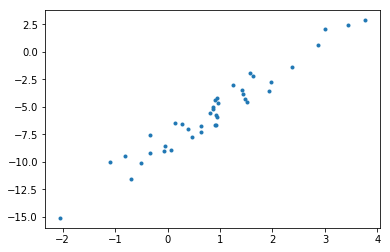

In [2]:
# example for OLS with GD and SGD

# generate random data
n = 40
x = np.random.randn(n) + 1
y = 3*x-8 + 3*(np.random.rand(n) - 0.5)
X = x[:,None]

# plot the points
plt.plot(x,y,'.');

In [3]:
# no need to read this code

squared_loss_fun = lambda pred, y: np.mean((pred-y[:,None])**2,axis=0)

def make_plot_pairs(w,β,t,titles=False, batch=None): 
    plt.figure(figsize=(8, 3))
    plt.subplot(1,2,1)
    plt.plot(x,y,'.')
    plt.plot(x,w[t]*x+β[t])
    if batch is not None:
        plt.plot(x[batch],y[batch],'o',color='red',markersize=10)
    plt.ylabel('iteration %d' % t)
    if titles:
        plt.title("Data space")
    
    plt.subplot(1,2,2)
    m = 100
    w_lin = np.linspace(-10.0, 10.0, m)
    β_lin = np.linspace(-10.0, 10.0, m)
    w_grid, β_grid = np.meshgrid(w_lin, β_lin)
    w_flat = w_grid.flatten()
    β_flat = β_grid.flatten()
    pred = w_flat[None]*X + β_flat[None]
    
    loss = squared_loss_fun(pred, y) 
    loss_grid = np.reshape(loss,[m,m])
    imin = np.argmin(loss_grid)
    plt.plot(w_flat[imin], β_flat[imin], 'r*', markersize=15)
    if batch is not None:
        loss = squared_loss_fun(pred[batch], y[batch]) 
        loss_grid = np.reshape(loss,[m,m])
        imin = np.argmin(loss_grid)
#         plt.plot(w_flat[imin], β_flat[imin], 'k*', markersize=10)
    CS = plt.contour(w_grid, β_grid, loss_grid)
#     plt.plot(w, β, 'b-x', markersize=10)
    plt.plot(w, β, 'b-o', markersize=5)
    plt.clabel(CS, inline=1, fontsize=10)
    if titles:
        plt.title("Parameter space")

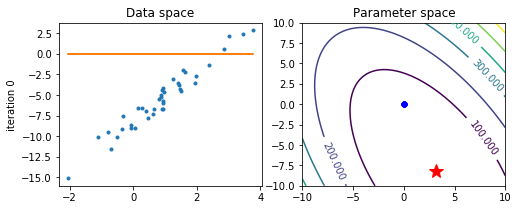

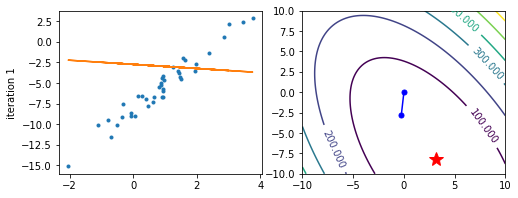

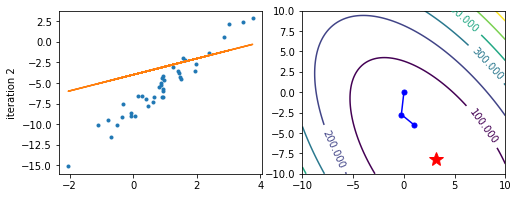

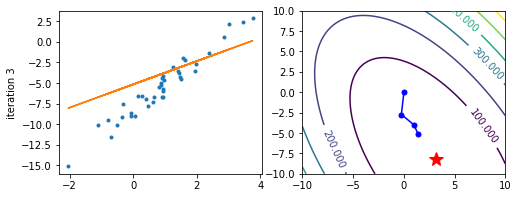

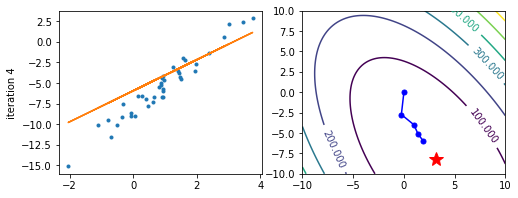

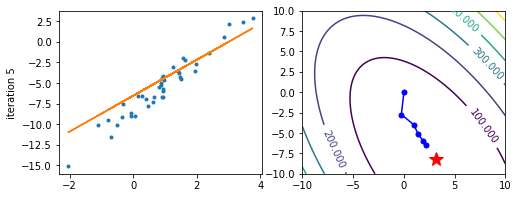

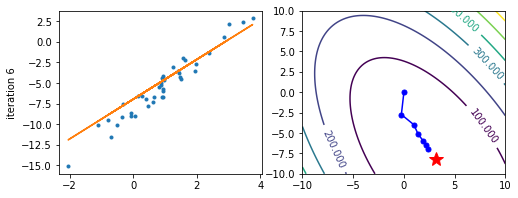

In [6]:
# gradient decent

α = 0.5
Nsteps = 6

w = np.zeros(Nsteps+1)
β = np.zeros(Nsteps+1)

make_plot_pairs(w,β,0,True)    
for t in range(Nsteps):
    
    dLdw = np.mean(x*(w[t]*x+β[t]-y))
    dLdβ = np.mean(w[t]*x+β[t]-y)
    w[t+1] = w[t] - α*dLdw
    β[t+1] = β[t] - α*dLdβ
    
    make_plot_pairs(w[:t+2],β[:t+2],t+1)


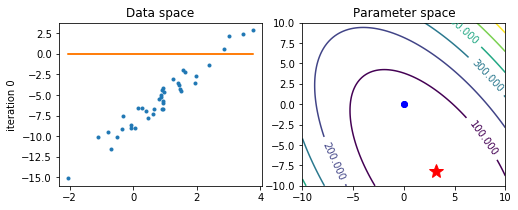

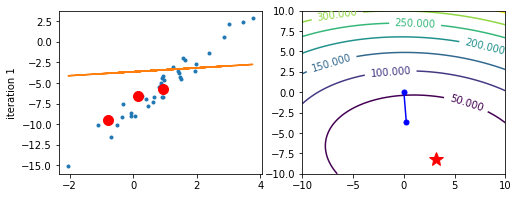

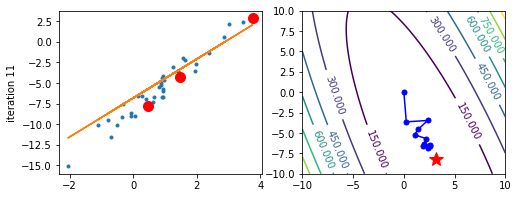

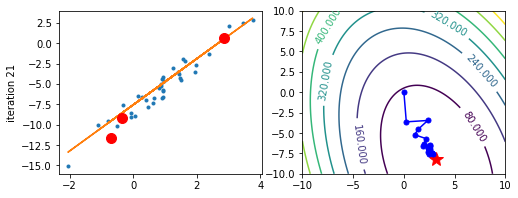

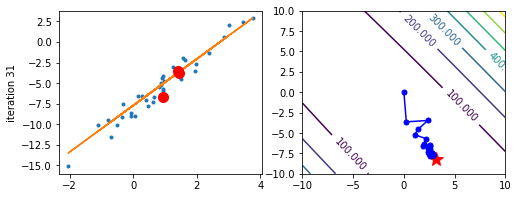

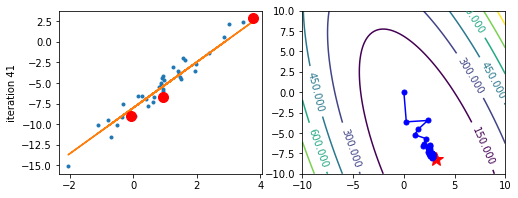

In [10]:
# stochastic gradient decent

α = 0.5
Nsteps = 50

w = np.zeros(Nsteps+1)
β = np.zeros(Nsteps+1)

# minibatch size = 1 is a bit misleading
# because the per-example loss is degenerate
minibatch_size = 3

make_plot_pairs(w,β,0,True)   
for t in range(Nsteps):
    
    i = np.random.choice(n,size=minibatch_size,replace=False) 
    
    dLdw = np.mean(x[i]*(w[t]*x[i]+β[t]-y[i]))
    dLdβ = np.mean(w[t]*x[i]+β[t]-y[i])
    w[t+1] = w[t] - α/np.sqrt(t+1)*dLdw
    β[t+1] = β[t] - α/np.sqrt(t+1)*dLdβ
    
    if t % 10 == 0: # plot every 10 iters
        make_plot_pairs(w[:t+2],β[:t+2],t+1,batch=i)